## Necessary imports :

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time
import warnings


# To suppress all warnings
warnings.filterwarnings("ignore")

#### Function to calculate buy and sell signal markers using crossover between two simple moving averages.

In [3]:
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if sma30 > sma100  then buy else sell
      if signal['SMA2'][i] > signal['SMA1'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['vwagy'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('Buy')
      elif signal['SMA2'][i] < signal['SMA1'][i]:
        if flag != 0:
          sigPriceSell.append(signal['vwagy'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('sell')
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

#### Visualisation Function to plot the signals

In [4]:
# Visualize The Stock buy and sell signals
def visualise(signal):
  title = 'Close Price History Buy / Sell Signals'

  my_stocks = signal
  ticker = 'Close'


  plt.figure(figsize=(12.2,4.5))
  plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
  plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)

  plt.plot( my_stocks['SMA2'],  label='SMA30', alpha = 0.35)
  plt.plot( my_stocks['SMA1'],  label='SMA100', alpha = 0.35)
  plt.title(title)
  #plt.xlabel('2020.04 - 2022.04',fontsize=15)
  plt.ylabel('Close Price USD ($)',fontsize=15)
  plt.legend( loc='upper left')
  plt.show()

## Loading the DS :

In [5]:
# Load the dataset
file_path = './data/fixed_income/IGIB_2020-04-07_2022-04-06.parquet' #'../data/fixed_income/IGIB_2020-04-07_2022-04-06.parquet'
data = pd.read_parquet(file_path)
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

In [6]:
data.head()

,VOLUME,VW,OPEN,CLOSE,HIGHT,LOW,t,TRANSACTIONS,a,op
DATE,,,,,,,,,,
2020-04-07 17:33:00,492.0,55.2914,55.2935,55.2900,55.2935,55.29,1586280780000,4,NaN,NaN
2020-04-07 17:34:00,5939.0,55.2968,55.3050,55.2902,55.3050,55.29,1586280840000,40,NaN,NaN
2020-04-07 17:35:00,6469.0,55.2896,55.2915,55.2850,55.3000,55.28,1586280900000,66,NaN,NaN
2020-04-07 17:36:00,3131.0,55.2881,55.2900,55.2900,55.2900,55.28,1586280960000,9,NaN,NaN
2020-04-07 17:37:00,1023.0,55.2956,55.2900,55.3000,55.3000,55.29,1586281020000,8,NaN,NaN


#### Buy/Sell Signal over the population data 
* window sizes used are 100 and 30. This calculates moving average over 100 and 30 records respectively.

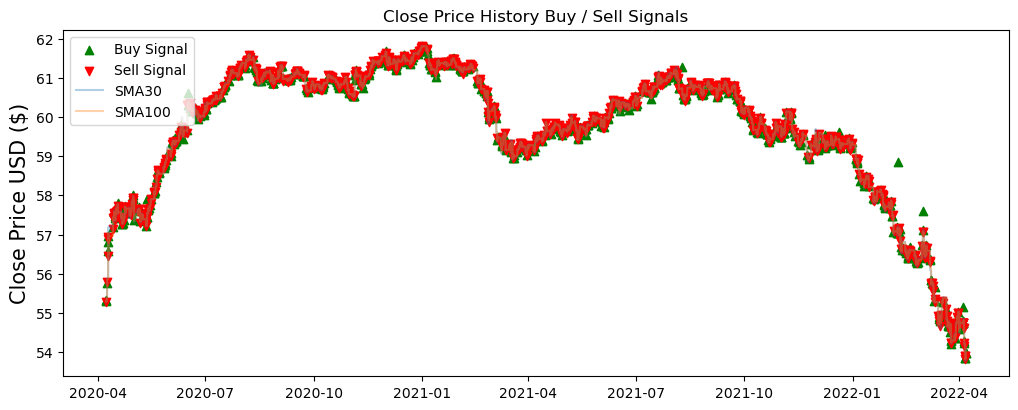

In [7]:
df=pd.DataFrame()
df['vwagy'] = data['CLOSE'].values
df.index=data.index
df.index.name=None

SMA1 = df.rolling(window=100).mean()
SMA2 = df.rolling(window=30).mean()

signal = pd.DataFrame(index=df['vwagy'].index)
signal['vwagy'] = df['vwagy']
signal['SMA1'] = SMA1['vwagy']
signal['SMA2'] = SMA2['vwagy']

x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] = x[1]
visualise(signal)

#### plot with a different window size
* moving average over 10000 and 3000 records. 
* A larger window sizes shows trend over larger duration

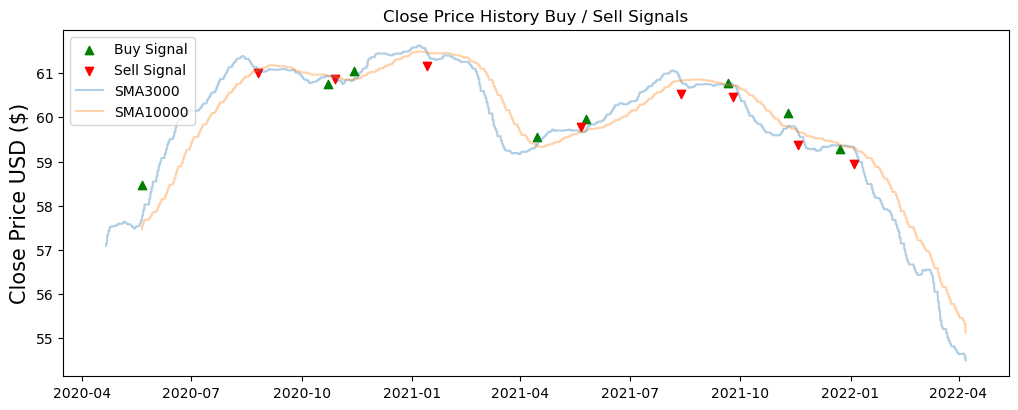

In [17]:
df=pd.DataFrame()
df['vwagy'] = data['CLOSE']
df.index=data.index
df.index.name=None

SMA1 = df.rolling(window=10000).mean()
SMA2 = df.rolling(window=3000).mean()

signal = pd.DataFrame(index=df['vwagy'].index)
signal['vwagy'] = df['vwagy']
signal['SMA1'] = SMA1['vwagy']
signal['SMA2'] = SMA2['vwagy']

x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] = x[1]

title = 'Close Price History Buy / Sell Signals'

my_stocks = signal
ticker = 'Close'

plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)

plt.plot( my_stocks['SMA2'],  label='SMA3000', alpha = 0.35)
plt.plot( my_stocks['SMA1'],  label='SMA10000', alpha = 0.35)
plt.title(title)
#plt.xlabel('2020.04 - 2022.04',fontsize=15)
plt.ylabel('Close Price USD ($)',fontsize=15)
plt.legend( loc='upper left')
plt.show()

### Sampling
* We pick sample from the dataset using 3 different sampling techniques and then plot the Buy/Sell signal again to observe the impact of sampling on our plot. The aim is to verify if the samples represent the population well enough.

In [89]:
num_clusters = 40
data['Cluster'] = np.random.randint(0, num_clusters, size=len(data))
selected_clusters = np.random.choice(num_clusters, size=4, replace=False)
cluster_sampled_data = data[data['Cluster'].isin(selected_clusters)]
#-------------
random_sampled_data = data.sample(frac=0.2)
#-------------
n_rows = 1000
sequential_sampled_data = data.iloc[:n_rows]
random_sampled_data = data.sample(frac=0.2)

Cluster Samples

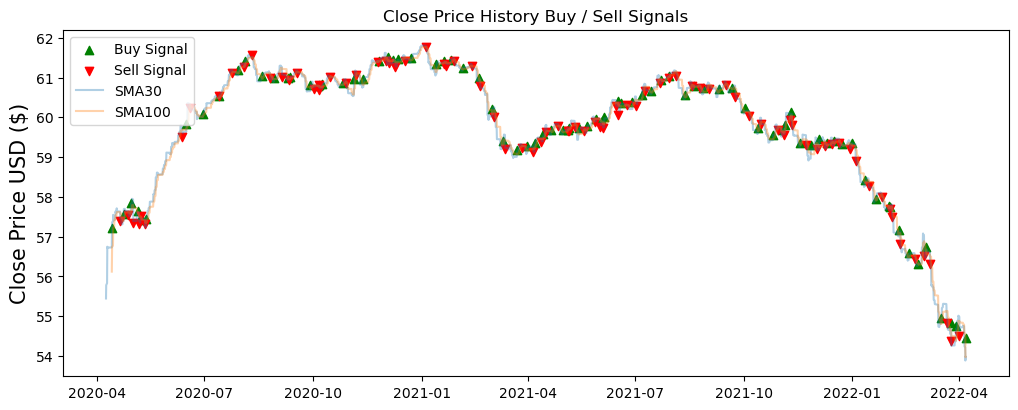

In [92]:
data_smp = cluster_sampled_data
#data.set_index('DATE', inplace=True)
df=pd.DataFrame()
df['vwagy'] = data_smp['CLOSE'].values
df.index=data_smp.index
df.index.name=None

SMA1 = df.rolling(window=100).mean()
SMA2 = df.rolling(window=30).mean()

signal = pd.DataFrame(index=df['vwagy'].index)
signal['vwagy'] = df['vwagy']
signal['SMA1'] = SMA1['vwagy']
signal['SMA2'] = SMA2['vwagy']

x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] = x[1]
visualise(signal)

Sequential Samples:

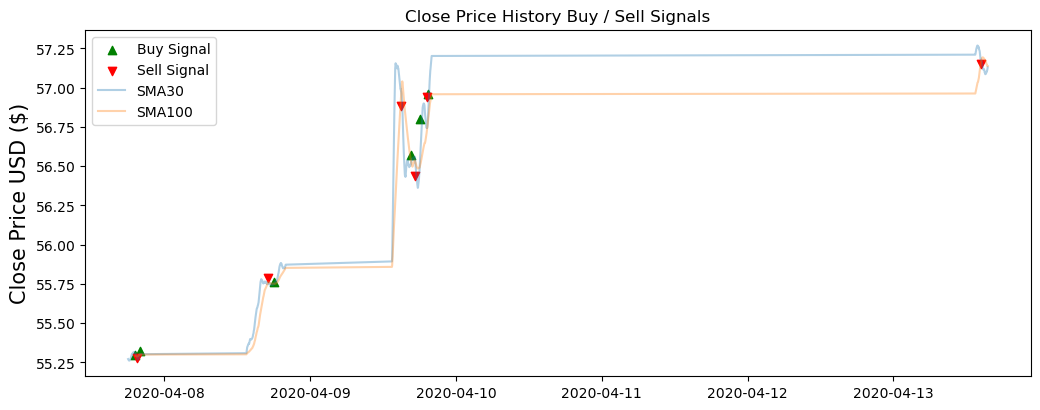

In [32]:
data_smp = sequential_sampled_data
#data.set_index('DATE', inplace=True)
df=pd.DataFrame()
df['vwagy'] = data_smp['CLOSE'].values
df.index=data_smp.index
df.index.name=None

SMA1 = df.rolling(window=100).mean()
SMA2 = df.rolling(window=30).mean()

signal = pd.DataFrame(index=df['vwagy'].index)
signal['vwagy'] = df['vwagy']
signal['SMA1'] = SMA1['vwagy']
signal['SMA2'] = SMA2['vwagy']

x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] = x[1]
visualise(signal)

Random Sampling

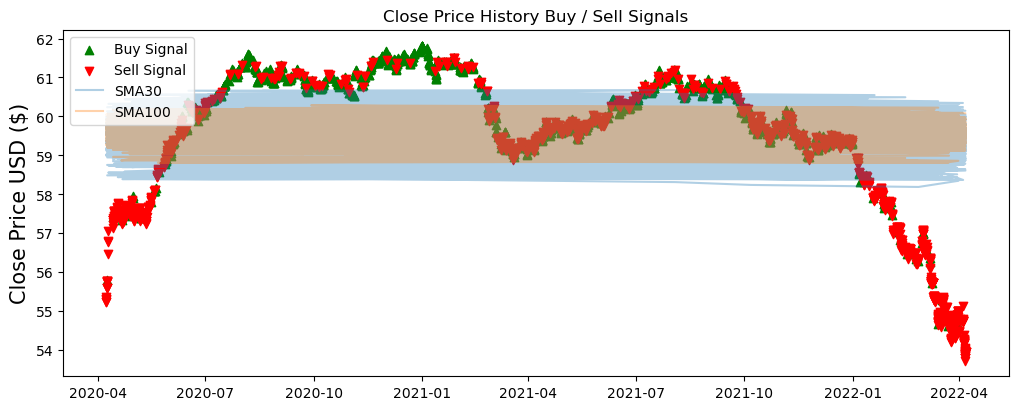

In [33]:
data_smp = random_sampled_data
#data.set_index('DATE', inplace=True)
df=pd.DataFrame()
df['vwagy'] = data_smp['CLOSE'].values
df.index=data_smp.index
df.index.name=None

SMA1 = df.rolling(window=100).mean()
SMA2 = df.rolling(window=30).mean()

signal = pd.DataFrame(index=df['vwagy'].index)
signal['vwagy'] = df['vwagy']
signal['SMA1'] = SMA1['vwagy']
signal['SMA2'] = SMA2['vwagy']

x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] = x[1]
visualise(signal)

From the above plots it is observed that cluster sampling and sequential sampling gives a good representation of the population. For randomly sampled data, the signal is too arbitrary to observe any trend.

### Using the sampled dataset to train a Machine learning model and observe how well the accuracy stays preserved.

## Basic EDA on data :

In [34]:
data.head(10)

,VOLUME,VW,OPEN,CLOSE,HIGHT,LOW,t,TRANSACTIONS,a,op,Cluster
2020-04-07 17:33:00,492.0,55.2914,55.2935,55.2900,55.2935,55.290,1586280780000,4,NaN,NaN,37
2020-04-07 17:34:00,5939.0,55.2968,55.3050,55.2902,55.3050,55.290,1586280840000,40,NaN,NaN,19
2020-04-07 17:35:00,6469.0,55.2896,55.2915,55.2850,55.3000,55.280,1586280900000,66,NaN,NaN,39
2020-04-07 17:36:00,3131.0,55.2881,55.2900,55.2900,55.2900,55.280,1586280960000,9,NaN,NaN,22
2020-04-07 17:37:00,1023.0,55.2956,55.2900,55.3000,55.3000,55.290,1586281020000,8,NaN,NaN,29
2020-04-07 17:38:00,8510.0,55.2811,55.2849,55.3000,55.3100,55.280,1586281080000,8,NaN,NaN,22
2020-04-07 17:39:00,3070.0,55.2993,55.2900,55.3000,55.3100,55.290,1586281140000,29,NaN,NaN,6
2020-04-07 17:40:00,3675.0,55.2958,55.3001,55.2750,55.3100,55.275,1586281200000,16,NaN,NaN,6
2020-04-07 17:41:00,261.0,55.3015,55.2900,55.3200,55.3200,55.290,1586281260000,3,NaN,NaN,6
2020-04-07 17:42:00,22741.0,55.2647,55.2900,55.2950,55.3200,55.260,1586281320000,20,NaN,NaN,9


In [35]:
data.describe()

,VOLUME,VW,OPEN,CLOSE,HIGHT,LOW,t,TRANSACTIONS,a,op,Cluster
count,1.643550e+05,164355.000000,164355.000000,164355.000000,164355.000000,164355.000000,1.643550e+05,164355.000000,1123.000000,1123.000000,164355.000000
mean,5.279892e+03,59.658363,59.658405,59.658377,59.661332,59.655420,1.618484e+12,14.985032,54.026376,54.106518,19.542223
std,4.924865e+04,1.715457,1.715335,1.715391,1.714571,1.716314,1.836427e+10,27.869193,0.252315,0.384245,11.529601
min,1.000000e+02,53.740200,53.740000,53.740000,53.740000,53.740000,1.586281e+12,1.000000,53.780400,53.840000,0.000000
25%,4.530000e+02,59.220150,59.220000,59.220000,59.225000,59.220000,1.602737e+12,3.000000,53.849400,53.840000,10.000000
50%,1.200000e+03,60.090700,60.090000,60.090000,60.095000,60.090000,1.618850e+12,7.000000,53.901300,53.840000,20.000000
75%,3.350000e+03,60.933400,60.932100,60.931600,60.935000,60.930000,1.634327e+12,15.000000,54.259150,54.660000,30.000000
max,9.548452e+06,62.000000,62.000000,62.000000,62.000000,62.000000,1.649276e+12,1425.000000,54.674600,54.660000,39.000000


## Detailed analysis on data :

In [36]:
[data['OPEN'].min(), data['OPEN'].max() ], [data['CLOSE'].min(), data['CLOSE'].max()]

([53.74, 62.0], [53.74, 62.0])

In [76]:
data = pd.read_parquet(file_path)
# Slicing date from the datetime format 
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)
# Define the prediction interval: 1
n_rows = 10 #appox 10mins

# Shift the close price by 'n_rows' to create the target i.e approx 10 min's
data['Future_Close'] = data['CLOSE'].shift(-n_rows)
#Creating target based on future close price as compared to current close price.
data['Target'] = (data['Future_Close'] > data['CLOSE']).astype(int)

# Drop NaN values created due to shifting
data.fillna(0,inplace=True)
#data.dropna(inplace=True)

In [77]:
#data

In [78]:
#data = data[['VOLUME', 'VW','OPEN', 'CLOSE', 'HIGHT', 'LOW','Target']]

## Training RandomForestClassifier on the population:

In [79]:
X = data.drop('Target', axis=1)
y = data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

st = time.time()
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

et = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("time: ",et-st)

Model Accuracy: 0.9517812053177573
time:  44.76878499984741


## - Implementing Different Sampling Techniques :


### A. Cluster Sampling :

In [80]:
# Assume 'data' is a DataFrame containing your dataset
# Define the number of clusters
num_clusters = 40

# Create a 'Cluster' column
data['Cluster'] = np.random.randint(0, num_clusters, size=len(data))

# Randomly select a few clusters
selected_clusters = np.random.choice(num_clusters, size=4, replace=False)

# Sample data from the selected clusters
cluster_sampled_data = data[data['Cluster'].isin(selected_clusters)]
#cluster_sampled_data

Result for cluster with 10% of the total data

### B. Random Sampling :

In [81]:
# Randomly sample a fraction of the data
random_sampled_data = data.sample(frac=0.1)
#random_sampled_data

### C. Sequential Sampling :

In [82]:
# Sample the first n rows
n_rows = 16436
sequential_sampled_data = data.iloc[:n_rows]

## Models for sampelling

#### Cluster :

In [83]:
# Define features and target
X = cluster_sampled_data.drop('Target', axis=1)
y = cluster_sampled_data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
st=time.time()
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
et=time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("time: ",et-st)

Model Accuracy: 0.7866544230180594
time:  4.26047420501709


#### Random

In [84]:
# Define features and target
X = random_sampled_data.drop('Target', axis=1)
y = random_sampled_data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
st=time.time()
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
et=time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("time: ",et-st)

Model Accuracy: 0.7785888077858881
time:  3.8447189331054688


#### Sequential Sampeling :


In [85]:
X = sequential_sampled_data.drop('Target', axis=1)
y = sequential_sampled_data['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
st = time.time()

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

et = time.time()
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("time: ",et-st)

Model Accuracy: 0.9221411192214112
time:  2.669797897338867


### Conclusion:

From the above results it can be observed that time taken to train the model, reduces drastically when using sample dataset. However the accuracy is impacted. We can see out of all three methods only sequential sampling preserves the accuracy and is closer to the result of population dataset. It is can be concluded that sequential sampling is a good method in case we want to train an ML model on time series data in least time. It gives a good representation of population just with a small part of the dataset. It is also quite usefull in case of real time analysis where data is available in chunks.

## END